In [4]:
#!pip install pandas_datareader

In [3]:
import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [6]:
start = datetime.date.today() - datetime.timedelta(365 * 20)
end = datetime.date.today()
prices = web.DataReader(["^GSPC"], "yahoo", start, end)["Adj Close"]

# Rename column to make names more intuitive
prices = prices.rename(columns={"^GSPC": "SP500"})
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:]

In [7]:
df.head()

Symbols,SP500
Date,
2002-10-29,-0.009118
2002-10-30,0.009657
2002-10-31,-0.005573
2002-11-01,0.017015
2002-11-04,0.008169


### 1.1 Are returns symmetric?


In [8]:
(len(df[df.SP500 > df.SP500.mean()])) / (len(df))

0.5253428741800835

### 1.2 Is Volatility constant?

<AxesSubplot:xlabel='Date', ylabel='S&P 500 STD'>

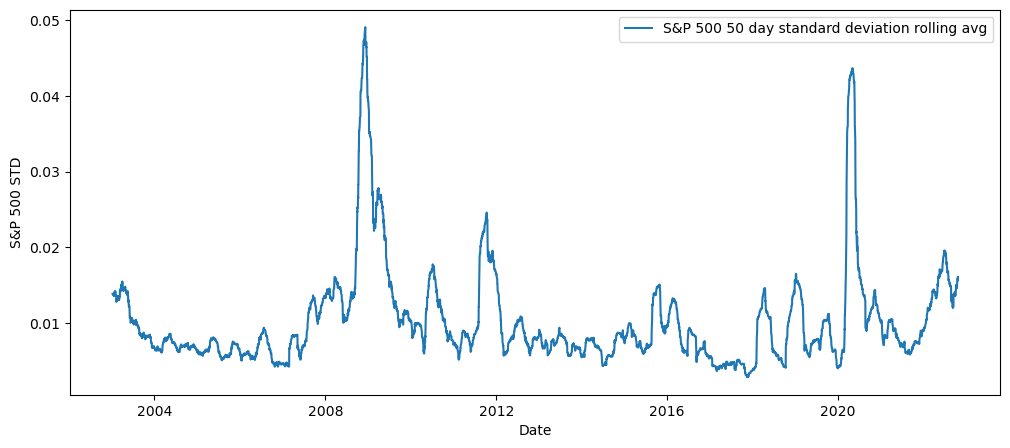

In [9]:
vols = pd.DataFrame(df.SP500.rolling(50).std()).rename(columns={"SP500": "S&P 500 STD"})
# set figure size
plt.figure(figsize=(12, 5))
# plot using rolling average
sns.lineplot(
    x="Date",
    y="S&P 500 STD",
    data=vols,
    label="S&P 500 50 day standard deviation rolling avg",
)

## 2. Are Stock Returns Normally Distributed?


array([[<AxesSubplot:title={'center':'SP500'}>]], dtype=object)

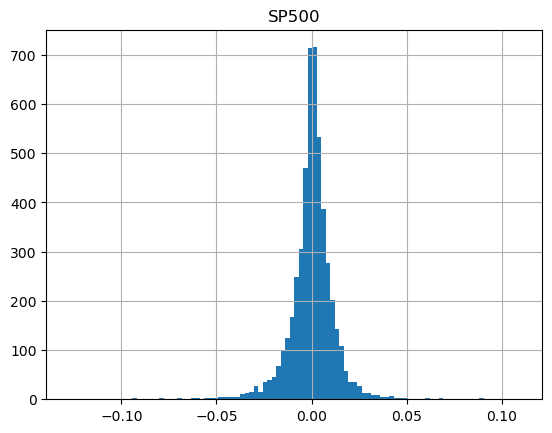

In [10]:
df.hist(bins=100)

### 2.1 Conducting a normality test

In [11]:
stats.normaltest((np.array(df.SP500)))

NormaltestResult(statistic=1213.7934822898028, pvalue=2.6797497291767452e-264)

### 2.2 Testing Skewness and Kurtosis


In [12]:
stats.jarque_bera((np.array(df.SP500))).pvalue

0.0

### 2.3 Where Does Our Gaussian Distribution Break Down?


In [14]:
dfMax = df.SP500.max()
dfMin = df.SP500.min()
print(
    "Min return of sample data is %.4f and the maximum return of sample data is %.4f"
    % (dfMin, dfMax)
)

Min return of sample data is -0.1277 and the maximum return of sample data is 0.1096


In [15]:
df.SP500.min()

-0.12765219747281709

In [16]:
(df.SP500.min() - df.SP500.mean()) / df.SP500.std()

-10.5291784775496

In [17]:
(df.SP500.max() - df.SP500.mean()) / df.SP500.std()

8.99412274910126

In [18]:
stats.norm.cdf(-10.45)

7.326261431744285e-26

In [19]:
(3 * df.SP500.std()) + df.SP500.mean()

0.03673844687239316

In [20]:
(-3 * df.SP500.std()) + df.SP500.mean()

-0.03616648728218292

In [21]:
df[(df["SP500"] > 0.03699) | (df["SP500"] < -0.0364)].tail()

Symbols,SP500
Date,
2020-06-11,-0.060753
2022-04-29,-0.036959
2022-05-18,-0.041234
2022-06-13,-0.039540
2022-09-13,-0.044199


In [22]:
len(df[(df["SP500"] > 0.05) | (df["SP500"] < -0.05)])

34

## 3. Non-Gaussian Distributions


In [23]:
stats.t.rvs(df=5030, size=5000)

array([-0.0251399 , -0.5580669 ,  0.48910195, ..., -1.28509488,
       -1.02477234, -0.47979914])

(array([0.00061023, 0.        , 0.00122047, 0.00061023, 0.00244093,
        0.00427163, 0.0073228 , 0.0073228 , 0.0128149 , 0.02013771,
        0.02379911, 0.04210611, 0.04515728, 0.07933036, 0.101909  ,
        0.12997974, 0.17147561, 0.19893612, 0.24531387, 0.27826648,
        0.31366002, 0.33745913, 0.38688804, 0.40519505, 0.41007692,
        0.39909271, 0.38200617, 0.3405103 , 0.33623866, 0.28558928,
        0.24104223, 0.20625892, 0.18123935, 0.1312002 , 0.10251923,
        0.08604292, 0.05370055, 0.04332658, 0.03051168, 0.01586607,
        0.01220467, 0.00976374, 0.00793304, 0.0036614 , 0.00305117,
        0.0018307 , 0.00061023, 0.00061023, 0.00061023, 0.00061023]),
 array([-4.02800054, -3.86412885, -3.70025715, -3.53638545, -3.37251376,
        -3.20864206, -3.04477036, -2.88089866, -2.71702697, -2.55315527,
        -2.38928357, -2.22541188, -2.06154018, -1.89766848, -1.73379678,
        -1.56992509, -1.40605339, -1.24218169, -1.07831   , -0.9144383 ,
        -0.7505666 , -0.58

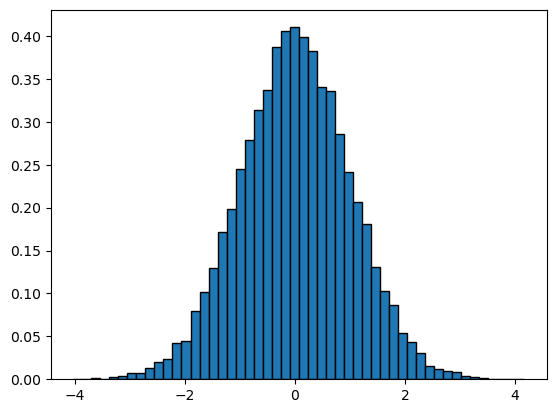

In [24]:
# generate t distribution with sample size 10000
x = stats.t.rvs(df=5030, size=10000)

# create plot of t distribution
plt.hist(x, density=True, edgecolor="black", bins=50)

In [25]:
t_stat, p = stats.ttest_ind(df["SP500"], stats.t.rvs(df=5030, size=5031))
print(f"t={t_stat}, p={p}")

t=-0.6405002676683997, p=0.5218620034652888
